In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # to calculate r^2
from sklearn.preprocessing import MinMaxScaler  # To scale all input features that are continuous
from sklearn.preprocessing import StandardScaler # standardize continuous data

In [2]:
# load the data
house_data = pd.read_csv('kc_house_data.csv')

In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
len(house_data)

21613

In [5]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


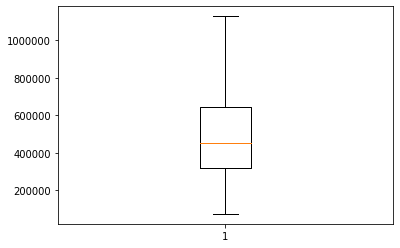

In [6]:
# it is a good idea to visualize the data before bulding the regression model.
# Visualize the distribution of the data

plt.boxplot(house_data['price'], 0, '')
plt.show()

In [7]:
# feature selection, these are dropped since they will not help in determining the price of the house
house_data = house_data.drop(['id', 'date', 'lat', 'long'], axis=1)

In [8]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [13]:
# shuffle the DF. Frac generates a sample form the dataset. reset_index will contain 0-n
house_data = house_data.sample(frac = 1).reset_index(drop=True)
house_data.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,15733,382500.0,3,2.00,1150,6249,1.0,0,0,3,7,1150,0,1952,2006,98155,2470,7751
1,7587,283748.0,3,2.25,1940,9560,2.0,0,0,3,7,1940,0,1989,0,98023,1800,9560
2,18452,360000.0,4,2.00,2680,18768,1.0,0,0,5,8,2680,0,1965,0,98001,1230,15750
3,11513,302000.0,3,2.50,2140,9492,2.0,0,0,3,8,2140,0,1994,0,98092,2180,9184
4,19500,410000.0,4,1.00,1970,4740,1.5,0,0,3,7,1670,300,1904,2005,98122,1510,4740


In [15]:
house_data['grade'].unique() # shows the unique values in this column (feature). Grade 1-13

array([ 7,  8, 11,  6, 10,  9,  5, 12,  4, 13,  3,  1])

In [21]:
np.sort(house_data['yr_built'].unique())

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [22]:
# looking for any NaN values in each column
house_data[house_data.isnull().any(axis=1)]

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


In [58]:
# Since there are no nan values I can continue
x = house_data.drop('price', axis=1)  # x is all the features but price
y = house_data['price']       # y is just the price

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [59]:
# set up the linear model
linear_model = LinearRegression()

# fit the model with the x, y train set 
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# model has been built, how well does it perform
# the value is not very good
linear_model.score(x_train, y_train)

0.654293215494617

In [61]:
# Check coeficient of eac input.
# + positive effect
# - negative effect
linear_model.coef_

array([-1.10187754e-01, -3.73342828e+04,  4.40315302e+04,  1.07619368e+02,
        4.34063791e-02,  3.03236760e+04,  6.04464279e+05,  3.83040644e+04,
        1.94512242e+04,  1.20935034e+05,  4.92370957e+01,  5.83822727e+01,
       -3.63351587e+03,  6.85017338e+00,  3.78359578e+00,  2.53559978e+01,
       -5.77425946e-01])

In [62]:
coefficients = pd.Series(linear_model.coef_, x_train.columns).sort_values()
print(coefficients)

bedrooms         -37334.282838
yr_built          -3633.515869
sqft_lot15           -0.577426
index                -0.110188
sqft_lot              0.043406
zipcode               3.783596
yr_renovated          6.850173
sqft_living15        25.355998
sqft_above           49.237096
sqft_basement        58.382273
sqft_living         107.619368
condition         19451.224244
floors            30323.675959
view              38304.064411
bathrooms         44031.530215
grade            120935.033691
waterfront       604464.278603
dtype: float64


In [63]:
y_pred = linear_model.predict(x_test)
y_pred


array([362616.77789699, 247612.86418006, 174109.21766787, ...,
       982219.48161093, 188458.81769461, 516802.69276119])

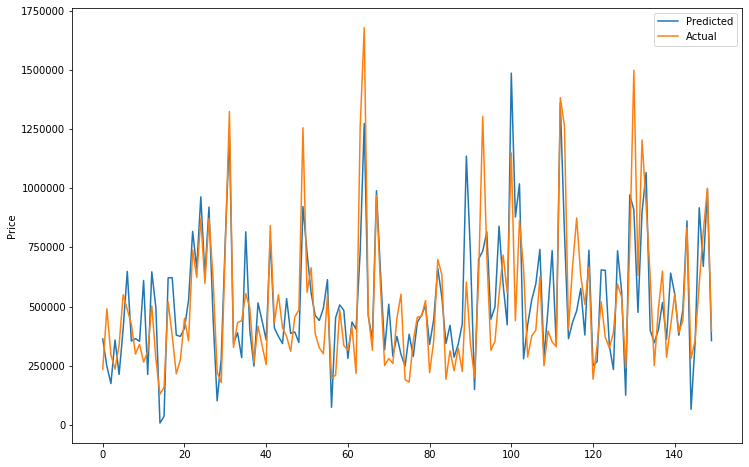

In [64]:
# visualize the test
plt.figure(figsize=(12, 8))

plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
r_square = linear_model.score(x_test, y_test)
r_square

0.6507785412116784

In [69]:
# how far are my values
model_mse = mean_squared_error(y_pred, y_test)
model_mse

49802298703.23145

In [70]:
# now its in the same scale
math.sqrt(model_mse)

223164.28635252427

In [71]:
x = house_data.drop(['zipcode'], axis=1)
y = house_data[['bedrooms', 'condition', 'grade', 'zipcode']]

In [72]:
x_continuous = house_data[['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                             'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'condition', 'grade']]

In [73]:
x_categorical = house_data[['waterfront', 'view']]

In [74]:
# onehot encoding
x_zipcode = pd.get_dummies(house_data['zipcode'], columns = ['zipcode'])
x_zipcode.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
scaler = MinMaxScaler(feature_range=(0,1))

In [76]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [77]:
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 1))>

In [78]:
scaled_x = scaler.fit_transform(x_continuous)

In [79]:
columns = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                             'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'condition', 'grade']

In [80]:
scaled_df = pd.DataFrame(data=scaled_x, columns = columns)

In [81]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,0.25000,0.064906,0.003470,0.0,0.094298,0.000000,0.452174,0.995533,0.356393,0.008156,0.090909,0.5,0.500000
1,0.28125,0.124528,0.005476,0.4,0.180921,0.000000,0.773913,0.000000,0.241094,0.010234,0.090909,0.5,0.500000
2,0.25000,0.180377,0.011054,0.0,0.262061,0.000000,0.565217,0.000000,0.143005,0.017344,0.121212,1.0,0.583333
3,0.31250,0.139623,0.005435,0.4,0.202851,0.000000,0.817391,0.000000,0.306488,0.009802,0.090909,0.5,0.583333
4,0.12500,0.126792,0.002556,0.2,0.151316,0.062241,0.034783,0.995037,0.191189,0.004697,0.121212,0.5,0.500000


In [82]:
scaled_df = pd.concat([scaled_df, x_categorical, x_zipcode], axis=1)

In [83]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.25000,0.064906,0.003470,0.0,0.094298,0.000000,0.452174,0.995533,0.356393,0.008156,...,0,0,1,0,0,0,0,0,0,0
1,0.28125,0.124528,0.005476,0.4,0.180921,0.000000,0.773913,0.000000,0.241094,0.010234,...,0,0,0,0,0,0,0,0,0,0
2,0.25000,0.180377,0.011054,0.0,0.262061,0.000000,0.565217,0.000000,0.143005,0.017344,...,0,0,0,0,0,0,0,0,0,0
3,0.31250,0.139623,0.005435,0.4,0.202851,0.000000,0.817391,0.000000,0.306488,0.009802,...,0,0,0,0,0,0,0,0,0,0
4,0.12500,0.126792,0.002556,0.2,0.151316,0.062241,0.034783,0.995037,0.191189,0.004697,...,0,0,0,0,0,0,0,0,0,0


In [84]:
x = scaled_df  # new scaled DF
y = house_data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [85]:
# rebuild LM model
# set fit_intercept to False when working with onehot encoding data
# if LRM tries to fit data we will avoid co-linearity problems due to onehot
linear_model = LinearRegression(fit_intercept=False) 
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [86]:
linear_model.score(x_train, y_train)

0.8106554814114035

In [87]:
# the r square value is much better than before, 0.65. 
# scalling and encoding has improved the model

In [88]:
linear_model.coef_

array([ 1.79766961e+05, -1.14709808e+18,  4.64578119e+05, -1.04682866e+05,
        7.89549776e+17,  4.17283983e+17, -8.96416202e+04,  2.64627390e+04,
        7.80385514e+04, -1.29296000e+05, -8.50080000e+05,  9.60640000e+04,
        7.00416000e+05,  6.79280000e+05,  5.06880000e+04, -3.67503000e+05,
       -3.36704000e+05, -3.78652000e+05,  3.96864000e+05, -5.84800000e+04,
       -9.35360000e+04, -1.18652000e+05, -1.14608000e+05, -2.82848000e+05,
       -2.41984000e+05, -2.55996000e+05, -2.74716000e+05, -3.80032000e+05,
       -3.98168000e+05, -2.02656000e+05, -1.96680000e+05, -2.43072000e+05,
       -1.54184000e+05, -3.58666000e+05, -3.51840000e+05, -3.64348000e+05,
        5.73600000e+03, -1.65376000e+05, -3.32800000e+05,  9.02592000e+05,
        1.45568000e+05, -3.63008000e+05, -2.72022000e+05, -1.38016000e+05,
       -1.77056000e+05, -3.14580000e+05, -2.63840000e+05, -3.36728000e+05,
       -2.80752000e+05, -2.84416000e+05, -4.11376000e+05, -2.20096000e+05,
       -1.99488000e+05, -

In [91]:
# there are less coefficients this time
coefficients = pd.Series(linear_model.coef_, x_train.columns).sort_values()

In [92]:
print(coefficients)

sqft_living     -1.147098e+18
bedrooms        -8.500800e+05
98070           -4.113760e+05
98092           -3.990640e+05
98023           -3.981680e+05
                     ...     
waterfront       6.792800e+05
grade            7.004160e+05
98039            9.025920e+05
sqft_basement    4.172840e+17
sqft_above       7.895498e+17
Length: 85, dtype: float64


In [93]:
# bedrooms is still negatively correlated
# zip codes also drive the prices down or up depending on the zon


In [94]:
y_pred = linear_model.predict(x_test)

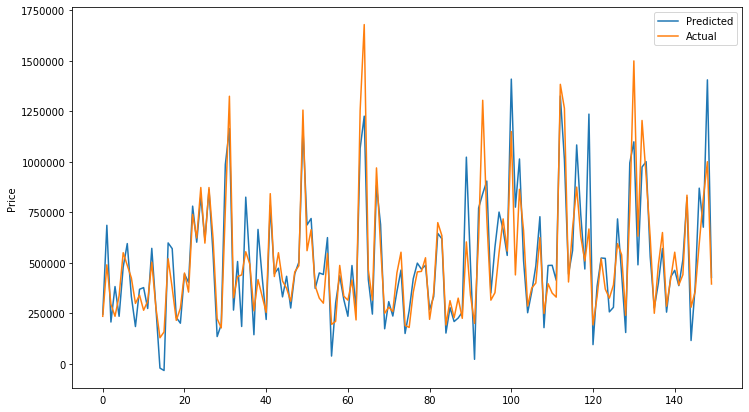

In [95]:
plt.figure(figsize=(12,7))
plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')

plt.ylabel('Price')
plt.legend()
plt.show()

In [96]:
r_square = linear_model.score(x_test, y_test)
r_square

0.7968151588294508

In [97]:
model_mse = mean_squared_error(y_pred, y_test)
model_mse

28976089233.04436

In [98]:
math.sqrt(model_mse)

170223.6447531434

In [99]:
# Lessons learned:
# Its important to preprocess the features before building the machine learning estimator to give better results. 

In [100]:
# Standardizing Continuous data
scaler = StandardScaler()

In [101]:
scaler
scaler.get_params

<bound method BaseEstimator.get_params of StandardScaler(copy=True, with_mean=True, with_std=True)>

In [105]:
# using the StandardScaler
scaled_x = scaler.fit_transform(x_continuous) # scaled values is an np array

In [106]:
scaled_df = pd.DataFrame(data=scaled_x, columns=columns)  # zero mean and STD = 1

In [107]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,-0.149007,-1.012500,-0.213860,-0.915427,-0.770936,-0.658681,-0.647033,4.784022,0.705376,-0.183766,-0.398737,-0.629187,-0.558836
1,0.175607,-0.152327,-0.133921,0.936506,0.183087,-0.658681,0.612638,-0.210128,-0.272190,-0.117511,-0.398737,-0.629187,-0.558836
2,-0.149007,0.653405,0.088389,-0.915427,1.076729,-0.658681,-0.204446,-0.210128,-1.103851,0.109200,0.676485,2.444294,0.291916
3,0.500221,0.065439,-0.135563,0.936506,0.424612,-0.658681,0.782864,-0.210128,0.282250,-0.131282,-0.398737,-0.629187,0.291916
4,-1.447464,-0.119662,-0.250292,0.010539,-0.142972,0.019186,-2.281202,4.781532,-0.695316,-0.294044,0.676485,-0.629187,-0.558836


In [108]:
scaled_df = pd.concat([scaled_df, x_categorical, x_zipcode], axis=1)

In [109]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,-0.149007,-1.012500,-0.213860,-0.915427,-0.770936,-0.658681,-0.647033,4.784022,0.705376,-0.183766,...,0,0,1,0,0,0,0,0,0,0
1,0.175607,-0.152327,-0.133921,0.936506,0.183087,-0.658681,0.612638,-0.210128,-0.272190,-0.117511,...,0,0,0,0,0,0,0,0,0,0
2,-0.149007,0.653405,0.088389,-0.915427,1.076729,-0.658681,-0.204446,-0.210128,-1.103851,0.109200,...,0,0,0,0,0,0,0,0,0,0
3,0.500221,0.065439,-0.135563,0.936506,0.424612,-0.658681,0.782864,-0.210128,0.282250,-0.131282,...,0,0,0,0,0,0,0,0,0,0
4,-1.447464,-0.119662,-0.250292,0.010539,-0.142972,0.019186,-2.281202,4.781532,-0.695316,-0.294044,...,0,0,0,0,0,0,0,0,0,0


In [110]:
x= scaled_df
y = house_data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [111]:
# Redifine the LG model
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [112]:
linear_model.score(x_train, y_train)

0.8106671765437795

In [113]:
y_pred = linear_model.predict(x_test)
r_square = linear_model.score(x_test, y_test)
r_square

0.796998907964587

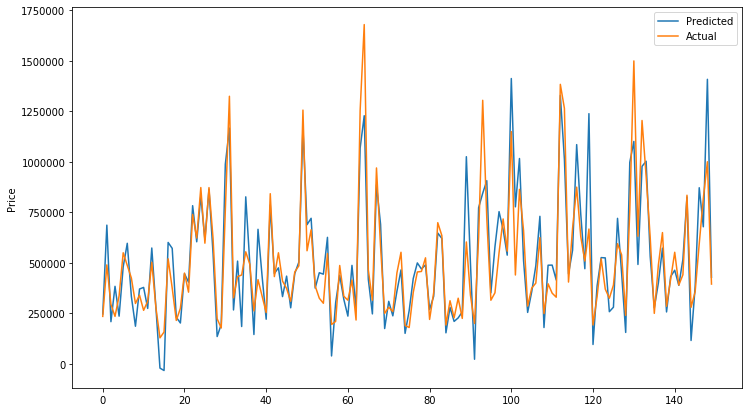

In [114]:
plt.figure(figsize=(12,7))
plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')

plt.ylabel('Price')
plt.legend()
plt.show()

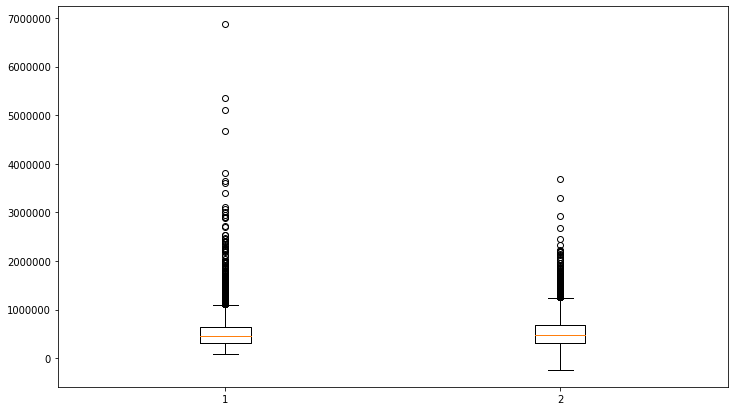

In [115]:
plt.figure(figsize=(12,7))
plt.boxplot([y_test, y_pred])
plt.show()

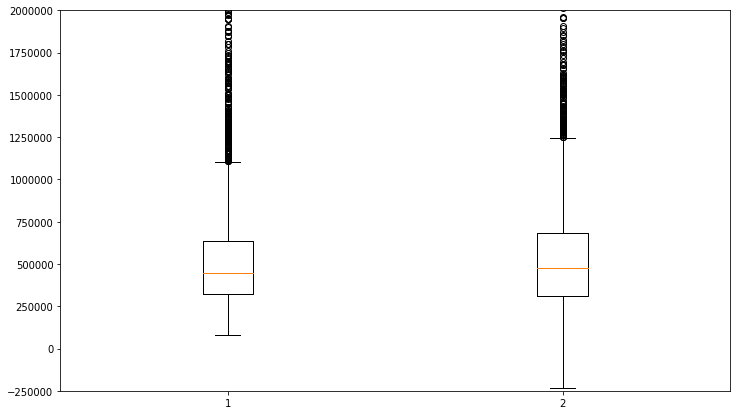

In [116]:
# it is dificult to predict outliers in any field

plt.figure(figsize=(12,7))
plt.ylim(bottom = -250000, top = 2000000)
plt.boxplot([y_test, y_pred])
plt.show()

In [ ]:
# Standard characteristics of the StandardScalers
# values will have a zero mean and a variance and std of 1.
# Z-score

In [ ]:
# practice onehot encoding with MattressSize feature ['Full', 'Twin', Queen', 'King']
# one-hot encoding instead of label encoding when you have more than two features
x_mattSize = pd.get_dummies(mattress['size'])

In [ ]:
# Recall two matrics that were used to evaluate regression model
# Mean Squared Error RMSE - most widely used, the lower the better

# r_squared score -- the higher the better. If more features are added the r_square may increase even if the 
# new features dont improve the model. In this case use adjusted r^2, calculates the score by taking into account
# the number of features. 
# r^2 measures how well the linear model captures the variance in the data

# Mean Absolute error

In [ ]:
# Enumerate the details conveyed in a Boxplot
# Lower edge: 1st quartile at 25% 
# upper edge: 3td quartile at 75%
# horizontal line: median vale for distribution
# whiskers: IQR: 3Q + 1.5IQR. 
#                1Q - 1.5IQR
# Outliers